In [16]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
import json
from pycocotools.coco import COCO
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##Конверт

In [17]:
def create_annotation_mask(coco_set, img_indx, image_root, category_name = 'asbest'):
    cat_ids  = coco_set.getCatIds(catNms=[category_name])
    img_ids  = coco_set.getImgIds(catIds=cat_ids );
    image_dict = coco_set.loadImgs(img_indx)[0]
    ann_ids = coco_set.getAnnIds(imgIds=image_dict['id'], catIds=cat_ids, iscrowd=None)
    anns = coco_set.loadAnns(ann_ids)
    if len(anns) > 0:
        for i in range(len(anns)):
            if i == 0:
                mask = np.array(coco_set.annToMask(anns[0]), dtype = np.int64)
            else:
                mask += coco_set.annToMask(anns[i])

        mask[mask>1] = 1#for stones!
    else: 
        w = coco_set.loadImgs(1)[0]['width']
        h = coco_set.loadImgs(1)[0]['height']
        mask = np.zeros((h,w))
    return mask

In [18]:
#Create asbest segmentation from annotation file
def create_segmentation_from_annotation(coco_dataset, image_root, out_segmentation_root, category_name):
    for idx, image_name in coco_dataset.imgs.items():
        name = image_name['file_name'].split('/')[-1].split('.')[0]
        try:
            mask = create_annotation_mask(coco_dataset, idx, image_root, category_name)
            plt.imsave(os.path.join(out_segmentation_root, name + '.jpeg'), mask, cmap='Greys')
        except Exception as err:
            print(idx, err)       
        if idx%10 == 0:
            print(idx)

In [4]:
# coco_set = COCO('/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/annotations/instances_default.json')
coco_set = COCO('/home/kirill/Учеба/asbestos/task_pits_stones_detections_111121-2021_12_03_05_40_57-coco 1.0/annotations/instances_default.json')
coco_set.dataset['categories']

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


[{'id': 1, 'name': 'stone', 'supercategory': ''},
 {'id': 2, 'name': 'asbest', 'supercategory': ''}]

### asbestos/task_pits_stones_detections_111121-2021_12_03_05_40_57-coco 1.0 

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
[{'id': 1, 'name': 'stone', 'supercategory': ''}, {'id': 2, 'name': 'asbest', 'supercategory': ''}]


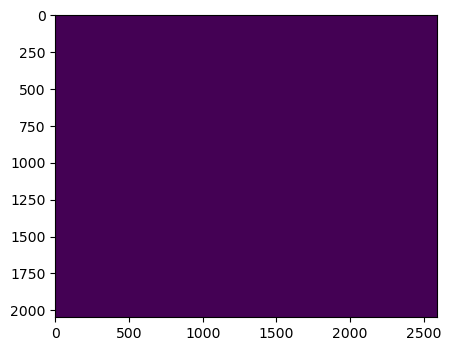

In [5]:
coco_set = COCO('/home/kirill/Учеба/asbestos/task_pits_stones_detections_111121-2021_12_03_05_40_57-coco 1.0/annotations/instances_default.json')
print(coco_set.dataset['categories'])
image_path = '/home/kirill/Учеба/asbestos/task_pits_stones_detections_111121-2021_12_03_05_40_57-coco 1.0/images/'

mask = create_annotation_mask(coco_set, 3, image_path, category_name='asbest')
fig = plt.figure(dpi = 100)
plt.imshow(mask)

In [20]:
segmentation_root = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
segmentation_rock_root = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationRock'
image_path = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/'

In [7]:
create_segmentation_from_annotation(coco_set, image_path, segmentation_rock_root, 'asbest')

10
20
30
40
50
56 local variable 'mask' referenced before assignment


## lab_common_set

In [8]:
dir_image = '/home/kirill/Учеба/asbestos/task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera'
files = os.listdir(dir_image)

In [13]:
image = np.array(Image.open(Path(dir_image, files[5])))
image.shape

(5184, 3456, 4)

In [14]:
for f in files:
    image = np.array(Image.open(Path(dir_image,f)))
    print(f,': ',image.shape)

IMG_2715.png :  (3456, 5184, 4)
IMG_2718.png :  (3456, 5184, 4)
IMG_2700.png :  (3456, 5184, 4)
IMG_2713.png :  (3456, 5184, 4)
IMG_2695.png :  (3456, 5184, 4)
IMG_2727.png :  (5184, 3456, 4)
IMG_2709.png :  (3456, 5184, 4)
IMG_2701.png :  (3456, 5184, 4)
IMG_2726.png :  (5184, 3456, 4)
IMG_2689.png :  (3456, 5184, 4)
IMG_2698.png :  (5184, 3456, 4)
IMG_2690.png :  (3456, 5184, 4)
IMG_2711.png :  (3456, 5184, 4)
IMG_2697.png :  (3456, 5184, 4)
IMG_2693.png :  (3456, 5184, 4)
IMG_2703.png :  (5184, 3456, 4)
IMG_2692.png :  (5184, 3456, 4)
IMG_2729.png :  (3456, 5184, 4)
IMG_2721.png :  (3456, 5184, 4)
IMG_2710.png :  (3456, 5184, 4)
IMG_2723.png :  (5184, 3456, 4)
IMG_2702.png :  (3456, 5184, 4)
IMG_2720.png :  (3456, 5184, 4)
IMG_2712.png :  (3456, 5184, 4)
IMG_2694.png :  (3456, 5184, 4)
IMG_2704.png :  (5184, 3456, 4)
IMG_2732.png :  (3456, 5184, 4)
IMG_2714.png :  (3456, 5184, 4)
IMG_2696.png :  (3456, 5184, 4)
IMG_2688.png :  (3456, 5184, 4)
IMG_2699.png :  (5184, 3456, 4)
IMG_2717

In [41]:
coco_set = COCO('/home/kirill/Учеба/asbestos/task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/annotations/instances_default.json')
coco_set.dataset['categories']

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


[{'id': 1, 'name': 'stone', 'supercategory': ''},
 {'id': 2, 'name': 'asbest', 'supercategory': ''}]

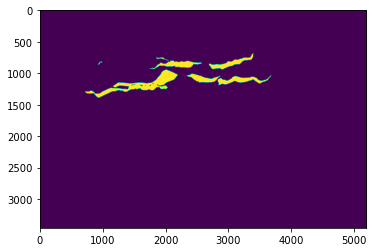

In [48]:
mask = create_annotation_mask(coco_set, 32, dir_image,'asbest')
plt.imshow(mask)

In [50]:
segment_dir = '/home/kirill/Учеба/asbestos/task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/SegmentationAsbest'
create_segmentation_from_annotation(coco_set,dir_image, segment_dir, 'asbest')

10
20
30
40
